<a href="https://colab.research.google.com/github/elpinchepastel/Indian_Pines/blob/master/Hyperspectral_Remote_Sensing_Scenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.io as sio
from scipy import stats, optimize, interpolate
from scipy.io import loadmat
import sklearn.preprocessing as sp
from sklearn.decomposition import PCA

In [2]:
annots = loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_gt.mat')
print(type(annots))
print(annots.keys())
print(type(annots['indian_pines_gt']),annots['indian_pines_gt'].shape)

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt'])
<class 'numpy.ndarray'> (145, 145)


In [3]:
annots = loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_corrected.mat')
print(type(annots))
print(annots.keys())
print(type(annots['indian_pines_corrected']),annots['indian_pines_corrected'].shape)

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])
<class 'numpy.ndarray'> (145, 145, 200)


In [4]:
data = scipy.io.loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_corrected.mat')['indian_pines_corrected']
print(data.shape)

(145, 145, 200)


In [5]:
indian_pines_gt = scipy.io.loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_gt.mat')['indian_pines_gt']
print(indian_pines_gt.shape)

(145, 145)


In [6]:
print(type(data))
print(type(indian_pines_gt))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
sio.whosmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_corrected.mat')

[('indian_pines_corrected', (145, 145, 200), 'double')]

In [8]:
sio.whosmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_gt.mat')

[('indian_pines_gt', (145, 145), 'double')]

In [9]:
print(indian_pines_gt)

[[3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
print(data)

[[[3172 4142 4506 ... 1057 1020 1020]
  [2580 4266 4502 ... 1064 1029 1020]
  [3687 4266 4421 ... 1061 1030 1016]
  ...
  [2570 3890 4320 ... 1042 1021 1015]
  [3170 4130 4320 ... 1054 1024 1020]
  [3172 3890 4316 ... 1043 1034 1016]]

 [[2576 4388 4334 ... 1047 1030 1006]
  [2747 4264 4592 ... 1055 1039 1015]
  [2750 4268 4423 ... 1047 1026 1015]
  ...
  [3859 4512 4605 ... 1056 1035 1015]
  [3686 4264 4690 ... 1051 1012 1020]
  [2744 4268 4597 ... 1047 1019 1016]]

 [[2744 4146 4416 ... 1055 1029 1025]
  [2576 4389 4416 ... 1051 1021 1011]
  [2744 4273 4420 ... 1068 1033 1010]
  ...
  [2570 4266 4509 ... 1051 1025 1010]
  [2576 4262 4496 ... 1047 1029 1020]
  [2742 4142 4230 ... 1042 1025 1011]]

 ...

 [[3324 3728 4002 ... 1003 1004 1004]
  [2983 3604 3829 ... 1011 1013 1008]
  [2988 3612 3913 ... 1012 1001 1004]
  ...
  [2564 4115 4103 ... 1003 1005 1013]
  [2730 4111 4103 ... 1015 1013 1004]
  [3156 3991 4103 ... 1017 1014 1000]]

 [[3161 3731 3834 ... 1002 1000 1000]
  [2727 3742

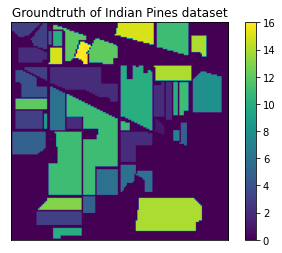

In [11]:
plt.imshow(indian_pines_gt)
plt.title('Groundtruth of Indian Pines dataset')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

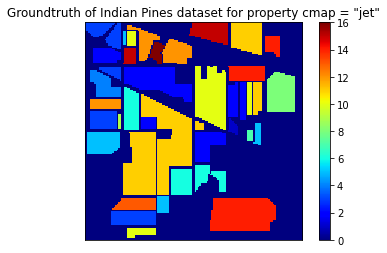

In [12]:
plt.imshow(indian_pines_gt, cmap = "jet", interpolation='nearest')
plt.title('Groundtruth of Indian Pines dataset for property cmap = "jet"')
plt.colorbar()
plt.savefig('/content/drive/My Drive/ITM/Indian Pines/img/imagen1.png')

plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
#from IPython.display import Image
#Image('/content/drive/My Drive/ITM/Indian Pines/img/imagen.png')

Enter the band number of the image you want to view (The number to be between 0 and 199): 
0
(145, 145)


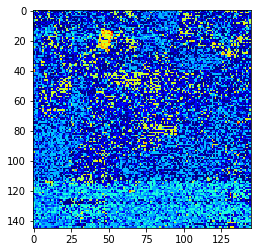

In [14]:
print('Enter the band number of the image you want to view (The number to be between 0 and 199): ')
count = int(input())
one_band = data[:, :, count]
plt.imshow(one_band, cmap = "jet", interpolation='nearest')
print(one_band.shape)

In [15]:
data = data.transpose((2, 0, 1))

In [16]:
print(data.shape)

(200, 145, 145)


In [17]:
array_expand = data[:,0,:]
for i_row in range(1, data.shape[1]):
    tempmatirx = data[:,i_row,:]
    array_expand = np.hstack((array_expand,tempmatirx))

In [18]:
print(array_expand.shape)

(200, 21025)


In [19]:
print(array_expand)

[[3172 2580 3687 ... 3153 3155 3323]
 [4142 4266 4266 ... 3864 4104 3860]
 [4506 4502 4421 ... 4282 4106 4197]
 ...
 [1057 1064 1061 ... 1003 1011 1007]
 [1020 1029 1030 ... 1008 1005 1004]
 [1020 1020 1016 ... 1000 1003 1000]]


In [20]:
#array_expand.transpose((1, 0))
print(array_expand.shape)

(200, 21025)


In [21]:
print(array_expand)

[[3172 2580 3687 ... 3153 3155 3323]
 [4142 4266 4266 ... 3864 4104 3860]
 [4506 4502 4421 ... 4282 4106 4197]
 ...
 [1057 1064 1061 ... 1003 1011 1007]
 [1020 1029 1030 ... 1008 1005 1004]
 [1020 1020 1016 ... 1000 1003 1000]]


In [22]:
valor_maximo = np.amax(array_expand)
array_expand_scaled = array_expand / valor_maximo

In [23]:
print(valor_maximo)
print(array_expand_scaled.shape)
array_expand_scaled = array_expand_scaled.transpose((1, 0))

9604
(200, 21025)


In [24]:
print(array_expand_scaled)

[[0.33027905 0.43127863 0.46917951 ... 0.11005831 0.10620575 0.10620575]
 [0.26863807 0.44418992 0.46876302 ... 0.11078717 0.10714286 0.10620575]
 [0.38390254 0.44418992 0.46032903 ... 0.1104748  0.10724698 0.10578925]
 ...
 [0.32830071 0.40233236 0.44585589 ... 0.10443565 0.10495627 0.10412328]
 [0.32850895 0.42732195 0.4275302  ... 0.10526864 0.1046439  0.10443565]
 [0.34600167 0.40191587 0.43700541 ... 0.10485214 0.10453978 0.10412328]]


In [25]:
num_com = 10
pca = PCA(n_components = num_com, whiten=False)
array_pca = pca.fit(array_expand_scaled)
array_pca = pca.transform(array_expand_scaled)
print("original shape:   ", array_expand_scaled.shape)
print("transformed shape:",  array_pca.shape)


original shape:    (21025, 200)
transformed shape: (21025, 10)


In [26]:
print(pca)
print(array_pca.shape)
print(array_pca)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
(21025, 10)
[[ 5.22168470e-01  1.51693384e-01  7.56945533e-03 ... -3.16923666e-02
   2.67003077e-02 -6.93737490e-03]
 [ 5.83234459e-01 -2.10688264e-01  3.64571700e-02 ...  2.50779905e-02
  -4.94430647e-02  9.73481279e-03]
 [ 6.03512645e-01 -3.21782055e-01  5.10766274e-02 ...  2.14401988e-02
   5.96100251e-02 -1.99525418e-02]
 ...
 [-7.67371324e-01 -1.17907306e-01  4.14587907e-02 ... -1.57783193e-02
   1.53423837e-02  6.84404056e-04]
 [-6.76498047e-01  8.31153720e-02  7.04715710e-02 ...  3.09194633e-02
   2.23328582e-02  1.68532263e-03]
 [-6.84137980e-01  3.61047087e-02  4.84642645e-02 ...  3.02278693e-02
   3.72506231e-02 -1.44223164e-02]]


In [27]:
num_max = np.amin(array_pca)
num_min = np.amax(array_pca)

In [28]:
print(num_max)
print(num_min)

-1.7735229066761196
1.8401188043113101


In [29]:
b = np.reshape(array_pca, (10, 145, 145)) 

In [30]:
print(b)

[[[ 5.22168470e-01  1.51693384e-01  7.56945533e-03 ...  2.30621292e-02
    2.52368602e-03 -1.34222566e-02]
  [ 8.17220139e-02  8.01960957e-03 -2.32557040e-02 ... -1.99277328e-02
    3.90160841e-02  5.80098341e-02]
  [-3.54687392e-01 -1.09098243e-01  4.78749227e-02 ...  1.04540194e-01
    4.53756982e-02 -6.86934374e-03]
  ...
  [ 3.97345505e-01  7.37475842e-01 -4.57284094e-02 ... -4.45180403e-02
    5.32137964e-02  9.53495229e-03]
  [ 8.00363743e-02 -1.13461920e-03 -3.88394191e-02 ...  2.48178159e-02
    2.26803992e-02 -5.57130991e-03]
  [ 5.18405722e-01 -2.39721480e-01 -2.06386819e-02 ...  5.01276807e-02
    2.21895555e-02 -5.45057290e-03]]

 [[-2.71506496e-02 -1.62759290e-02 -3.89013455e-02 ... -4.90807823e-02
   -6.08790706e-02  6.49191428e-03]
  [ 8.25826763e-02  2.06718389e-01 -7.77345576e-03 ...  6.90102228e-02
    1.88191146e-02 -1.40600374e-02]
  [ 3.69630145e-02 -6.08563264e-02  6.31357538e-02 ... -2.08500331e-04
    7.00091393e-02 -4.86302368e-03]
  ...
  [ 1.59747274e-02 -2.1

In [31]:
print(b.shape)

(10, 145, 145)


In [38]:
c = np.amin(b)
d = np.amax(b)

In [39]:
print(c)
print(d)

-1.7735229066761196
1.8401188043113101


Enter the band number of the image you want to view (The number to be between 0 and 199): 
3
(145, 145)


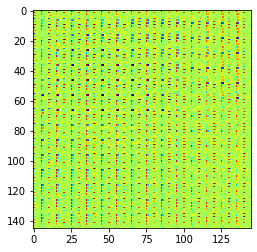

In [44]:
print('Enter the band number of the image you want to view (The number to be between 0 and 199): ')
count = int(input())
one_band = b[count, :, :]
plt.imshow(one_band, cmap = "jet", interpolation='nearest')
print(one_band.shape)